In [1]:
import gym
import mdptoolbox
import example
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import hiive.mdptoolbox.mdp
from matplotlib.ticker import FormatStrFormatter




In [2]:
environment = 'FrozenLake-v1'
env = gym.make(environment)

In [3]:
P, R = example.openai(environment, render=True)
pi = mdptoolbox.mdp.PolicyIteration(P, R, discount=0.5, policy0 = np.zeros(env.nS))
pi.setVerbose()
pi.run()
pi.V


SFFF
FHFH
FFFH
HFFG
  Iteration		Number of different actions
    1		  1
    2		  6
    3		  5
    4		  2
    5		  0
Iterating stopped, unchanging policy found.


(0.0003813657824168717,
 0.0006335430874242961,
 0.002786349654704609,
 0.0006965874136761522,
 0.0012732858246600625,
 0.0,
 0.013235160859846894,
 0.0,
 0.005985063340883442,
 0.028652030879757148,
 0.07662461550437676,
 0.0,
 0.0,
 0.0893025064332827,
 0.41786050128665647,
 0.0)


SFFF
FHFH
FFFH
HFFG


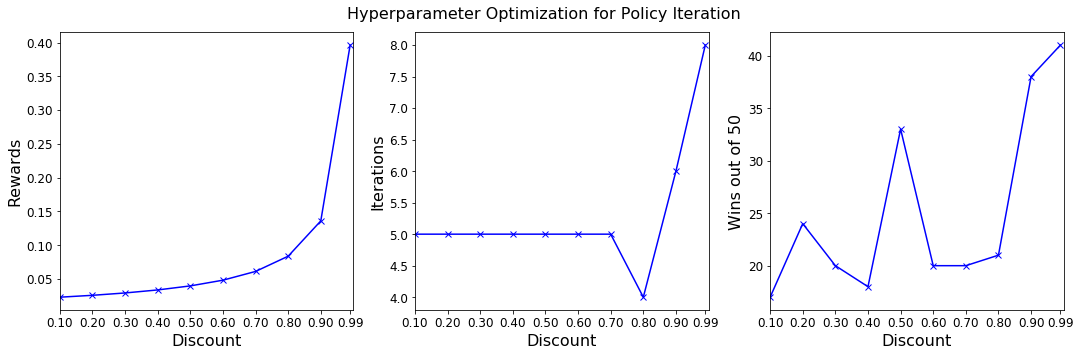

In [4]:
env = gym.make(environment)
P, R = example.openai(environment, render=True)


l = np.linspace(0.1,0.9,9)
l = np.append(l,0.99)
reward = []
iters = []
wins = []
for disc in l:
    pi = mdptoolbox.mdp.PolicyIteration(P, R, discount=disc, policy0 = np.zeros(env.nS))
    pi.run()
    reward.append(np.array(pi.V).mean())
    iters.append(pi.iter)
    policy = pi.policy
    win = 0
    for sim in range(50):
        env = gym.make(environment)
        env.reset()
        state = 0
        d = False
        while(d == False):
            action = policy[state]
            state, _, d, p = env.step(action)
        if state == 15:
            win += 1
    wins.append(win)

fig, ax1 = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
ax1[0].plot(l ,reward, 'bx-')
ax1[0].set_xlabel('Discount',fontsize=16)
ax1[0].set_ylabel('Rewards',fontsize=16)
ax1[0].set_xlim((0.1,1))
ax1[0].set_xticks(l)
ax1[0].set_title('')

ax1[1].plot(l ,iters, 'bx-')
ax1[1].set_xlabel('Discount',fontsize=16)
ax1[1].set_ylabel('Iterations',fontsize=16)
ax1[1].set_xlim((0.1,1))
ax1[1].set_xticks(l)
ax1[1].set_title('')

ax1[2].plot(l ,wins, 'bx-')
ax1[2].set_xlabel('Discount',fontsize=16)
ax1[2].set_ylabel('Wins out of 50',fontsize=16)
ax1[2].set_xlim((0.1,1))
ax1[2].set_xticks(l)
ax1[2].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=12)
ax1[1].tick_params(axis='both', which='major', labelsize=12)
ax1[2].tick_params(axis='both', which='major', labelsize=12)

fig.suptitle('Hyperparameter Optimization for Policy Iteration',fontsize=16)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.3, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()


    


SFFF
FHFH
FFFH
HFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
[0.005037069320678711, 0.009969711303710938]
[6, 10]


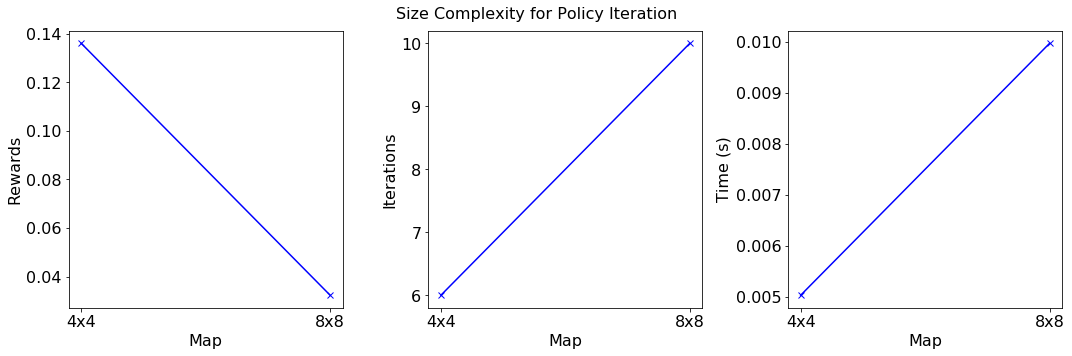

In [5]:
maps = ["4x4", "8x8"]
reward = []
iters = []
time = []
for mp in maps:
    if mp == "4x4":
        disc = 0.9
    else:
        disc = 0.8    
    env = gym.make(environment,map_name=mp)
    P, R = example.openai(environment, render=True, map_name=mp)
    pi = mdptoolbox.mdp.PolicyIteration(P, R, discount=disc, policy0 = np.zeros(env.nS))
    pi.run()
    reward.append((np.array(pi.V)).mean())
    iters.append(pi.iter)
    time.append(pi.time)
    
print(time)
print(iters)
fig, ax1 = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
ax1[0].plot(maps ,reward, 'bx-')
ax1[0].set_xlabel('Map',fontsize=16)
ax1[0].set_ylabel('Rewards',fontsize=16)
ax1[0].set_title('')

ax1[1].plot(maps ,iters, 'bx-')
ax1[1].set_xlabel('Map',fontsize=16)
ax1[1].set_ylabel('Iterations',fontsize=16)
ax1[1].set_title('')

ax1[2].plot(maps ,time, 'bx-')
ax1[2].set_xlabel('Map',fontsize=16)
ax1[2].set_ylabel('Time (s)',fontsize=16)
ax1[2].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=16)
ax1[1].tick_params(axis='both', which='major', labelsize=16)
ax1[2].tick_params(axis='both', which='major', labelsize=16)

fig.suptitle('Size Complexity for Policy Iteration',fontsize=16)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.2, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()
    



SFFF
FHFH
FFFH
HFFG


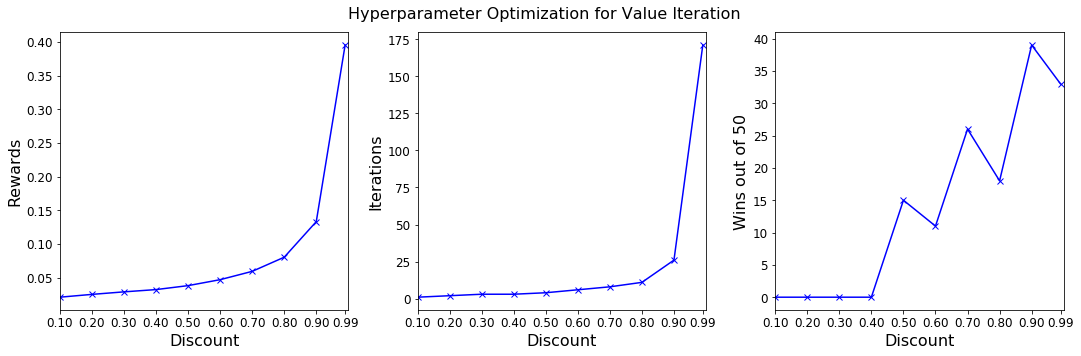

In [6]:
env = gym.make(environment)
P, R = example.openai(environment, render=True)


l = np.linspace(0.1,0.9,9)
l = np.append(l,0.99)
reward = []
iters = []
wins = []
for disc in l:
    pi = mdptoolbox.mdp.ValueIteration(P, R, discount=disc)
    pi.run()
    reward.append(np.array(pi.V).mean())
    iters.append(pi.iter)
    policy = pi.policy
    win = 0
    for sim in range(50):
        env = gym.make(environment)
        env.reset()
        state = 0
        d = False
        while(d == False):
            action = policy[state]
            state, _, d, p = env.step(action)
        if state == 15:
            win += 1
    wins.append(win)

fig, ax1 = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
ax1[0].plot(l ,reward, 'bx-')
ax1[0].set_xlabel('Discount',fontsize=16)
ax1[0].set_ylabel('Rewards',fontsize=16)
ax1[0].set_xlim((0.1,1))
ax1[0].set_xticks(l)
ax1[0].set_title('')

ax1[1].plot(l ,iters, 'bx-')
ax1[1].set_xlabel('Discount',fontsize=16)
ax1[1].set_ylabel('Iterations',fontsize=16)
ax1[1].set_xlim((0.1,1))
ax1[1].set_xticks(l)
ax1[1].set_title('')

ax1[2].plot(l ,wins, 'bx-')
ax1[2].set_xlabel('Discount',fontsize=16)
ax1[2].set_ylabel('Wins out of 50',fontsize=16)
ax1[2].set_xlim((0.1,1))
ax1[2].set_xticks(l)
ax1[2].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=12)
ax1[1].tick_params(axis='both', which='major', labelsize=12)
ax1[2].tick_params(axis='both', which='major', labelsize=12)

fig.suptitle('Hyperparameter Optimization for Value Iteration',fontsize=16)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.3, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()



SFFF
FHFH
FFFH
HFFG

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
[0.0019936561584472656, 0.0]
[26, 26]


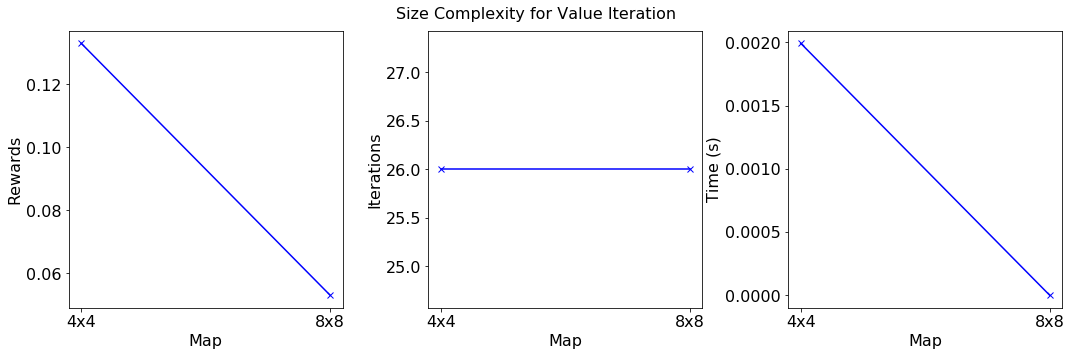

In [7]:
maps = ["4x4", "8x8"]
reward = []
iters = []
time = []
for mp in maps:
    if mp == "4x4":
        disc = 0.9
    else:
        disc = 0.9    
    env = gym.make(environment,map_name=mp)
    P, R = example.openai(environment, render=True, map_name=mp)
    pi = mdptoolbox.mdp.ValueIteration(P, R, discount=disc)
    pi.run()
    reward.append((np.array(pi.V)).mean())
    iters.append(pi.iter)
    time.append(pi.time)
    
print(time)
print(iters)
fig, ax1 = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
ax1[0].plot(maps ,reward, 'bx-')
ax1[0].set_xlabel('Map',fontsize=16)
ax1[0].set_ylabel('Rewards',fontsize=16)
ax1[0].set_title('')

ax1[1].plot(maps ,iters, 'bx-')
ax1[1].set_xlabel('Map',fontsize=16)
ax1[1].set_ylabel('Iterations',fontsize=16)
ax1[1].set_title('')

ax1[2].plot(maps ,time, 'bx-')
ax1[2].set_xlabel('Map',fontsize=16)
ax1[2].set_ylabel('Time (s)',fontsize=16)
ax1[2].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=16)
ax1[1].tick_params(axis='both', which='major', labelsize=16)
ax1[2].tick_params(axis='both', which='major', labelsize=16)

fig.suptitle('Size Complexity for Value Iteration',fontsize=16)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.2, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()
    


In [14]:
env = gym.make(environment)
P, R = example.openai(environment, render=True)

R[:] = -1
R[14,1:] = 100.
R[1,0:3] = -100
R[3,0:3] = -100
R[4,1:] = -100
R[6,0] = -100; R[6,1] = -200; R[6,2] = -100; R[6,3] = -200
R[8,0:3] = -100
R[9,0] = -100; R[9,2:] = -100
R[10,1:] = -100
R[13,0:2] = -100; R[13,3] = -100


SFFF
FHFH
FFFH
HFFG


In [15]:
#env = gym.make(environment)
#P, R = example.openai(environment, render=True)


gamma = np.linspace(0.5, 0.9, 5)
alpha = np.linspace(0.1, 0.9, 5)
alpha_decay = [0.95, 0.97, 0.99]
epsilon = np.linspace(0.5, 1., 6)
epsilon_decay = [0.95, 0.97, 0.99]
#reward = []
#iters = []
#wins = []
winmax = 0
for gam in gamma:
    for alp in alpha:
        for alpd in alpha_decay:
            for eps in epsilon:
                for epsd in epsilon_decay:  
                    np.random.seed(1)
                    pi = hiive.mdptoolbox.mdp.QLearning(P, R, gamma = gam, alpha = alp, alpha_decay = alpd, epsilon = eps, epsilon_decay = epsd, n_iter = 10000 )
                    pi.run()
                    #reward.append(np.array(pi.V).mean())
                    #iters.append(pi.iter)
                    policy = pi.policy
                    win = 0
                    for sim in range(50):
                        env = gym.make(environment)
                        env.reset()
                        state = 0
                        d = False
                        while(d == False):
                            action = policy[state]
                            np.random.seed(1)
                            state, _, d, p = env.step(action)
                        if state == 15:
                            win += 1
                    #print (gam, alp, alpd, eps, epsd, win, np.array(pi.V).mean(), pi.time )
                    if win > winmax:
                        winmax = win
                        print("new win", gam, alp, alpd, eps, epsd, win, np.array(pi.V).mean(), pi.time)





#alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                 epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
#                 n_iter=10000

new win 0.5 0.1 0.95 0.5 0.95 12 0.07545451158441838 0.40608882904052734
new win 0.5 0.1 0.95 0.5 0.97 16 0.0754575898494414 0.41562819480895996
new win 0.5 0.1 0.95 0.5 0.99 30 0.1703956064148801 0.5162613391876221
new win 0.5 0.1 0.95 0.6 0.97 43 0.11788578554404103 0.4519374370574951


KeyboardInterrupt: 

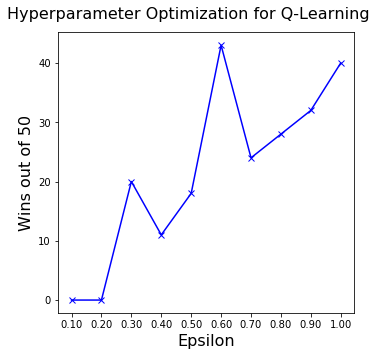

In [21]:
#env = gym.make(environment)
#P, R = example.openai(environment, render=True)


l = np.linspace(0.1,1.0,10)
reward = []
iters = []
wins = []
for eps in l:
    np.random.seed(1)
    pi = hiive.mdptoolbox.mdp.QLearning(P, Rmod, gamma = 0.5, alpha = 0.1, alpha_decay = 0.95, epsilon = eps, epsilon_decay = 0.97, n_iter = 10000 )
    pi.run()
    reward.append(np.array(pi.V).mean())
    #iters.append(pi.iter)
    policy = pi.policy
    win = 0
    for sim in range(50):
        env = gym.make(environment)
        env.reset()
        state = 0
        d = False
        while(d == False):
            action = policy[state]
            np.random.seed(1)
            state, _, d, p = env.step(action)
        if state == 15:
            win += 1
    wins.append(win)

fig, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))

#ax1[1].plot(l ,iters, 'bx-')
#ax1[1].set_xlabel('Discount',fontsize=16)
#ax1[1].set_ylabel('Iterations',fontsize=16)
#ax1[1].set_xlim((0.1,1))
#ax1[1].set_xticks(l)
#ax1[1].set_title('')

ax1.plot(l ,wins, 'bx-')
ax1.set_xlabel('Epsilon',fontsize=16)
ax1.set_ylabel('Wins out of 50',fontsize=16)
ax1.set_xticks(l)
ax1.set_title('')

ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.suptitle('Hyperparameter Optimization for Q-Learning',fontsize=16)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.3, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()


In [25]:
pi = hiive.mdptoolbox.mdp.QLearning(P, Rmod, gamma = 0.5, alpha = 0.1, alpha_decay = 0.95, epsilon = 0.6, epsilon_decay = 0.97, n_iter = 10000 )
pi.run()
np.reshape(np.array(pi.policy),(4,4))

array([[1, 3, 3, 3],
       [0, 1, 2, 0],
       [3, 1, 0, 1],
       [3, 2, 2, 2]])

In [ ]:
maps = ["4x4", "8x8"]
reward = []
time = []
for mp in maps:  
    env = gym.make(environment,map_name=mp)
    P, R = example.openai(environment, render=True, map_name=mp)
    np.random.seed(1)
    pi = hiive.mdptoolbox.mdp.QLearning(P, R, gamma = 0.8, alpha = 0.7, alpha_decay = 0.97, epsilon = eps, epsilon_decay = 0.97, n_iter = 10000 )
    pi.run()
    reward.append((np.array(pi.V)).mean())
    time.append(pi.time)
    
fig, ax1 = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax1[0].plot(maps ,reward, 'bx-')
ax1[0].set_xlabel('Map',fontsize=16)
ax1[0].set_ylabel('Rewards',fontsize=16)
ax1[0].set_title('')

ax1[1].plot(maps ,time, 'bx-')
ax1[1].set_xlabel('Map',fontsize=16)
ax1[1].set_ylabel('Time (s)',fontsize=16)
ax1[1].set_title('')

ax1[0].tick_params(axis='both', which='major', labelsize=16)
ax1[1].tick_params(axis='both', which='major', labelsize=16)

fig.suptitle('Size Complexity for Q-Learning',fontsize=16)
plt.subplots_adjust(left = 0.125, right = 1.2, bottom = 0.1, top = 0.2, wspace = 0.2, hspace = 0.3)    
plt.tight_layout()
plt.show()
    


In [9]:
env = gym.make(environment)
P, R = example.openai(environment, render=True)

pi = mdptoolbox.mdp.ValueIteration(P, Rmod, discount=0.9)
pi.run()
VIpolicy = np.reshape(list(pi.policy),(4,4))
print(VIpolicy)
print(pi.iter,pi.time,(np.array(pi.V)).mean())

pi = mdptoolbox.mdp.PolicyIteration(P, Rmod, discount=0.9)
pi.run()
PIpolicy = np.reshape(list(pi.policy),(4,4))
print(PIpolicy)
print(pi.iter,pi.time,(np.array(pi.V)).mean())

np.random.seed(1)
pi = hiive.mdptoolbox.mdp.QLearning(P, Rmod, gamma = 0.5, alpha = 0.1, alpha_decay = 0.99, epsilon = 0.7, epsilon_decay = 0.97, n_iter = 10000 )
pi.run()
QLpolicy = np.reshape(list(pi.policy),(4,4))
print(QLpolicy)
print(pi.time,(np.array(pi.V)).mean())


SFFF
FHFH
FFFH
HFFG


NameError: name 'Rmod' is not defined

In [10]:
env = gym.make(environment)
P, R = example.openai(environment, render=True)

R[:] = -1
R[14,1:] = 100.
R[1,0:3] = -100
R[3,0:3] = -100
R[4,1:] = -100
R[6,0] = -100; R[6,1] = -200; R[6,2] = -100; R[6,3] = -200
R[8,0:3] = -100
R[9,0] = -100; R[9,2:] = -100
R[10,1:] = -100
R[13,0:2] = -100; R[13,3] = -100

Rmod = R
Rmod



SFFF
FHFH
FFFH
HFFG


array([[  -1.,   -1.,   -1.,   -1.],
       [-100., -100., -100.,   -1.],
       [  -1.,   -1.,   -1.,   -1.],
       [-100., -100., -100.,   -1.],
       [  -1., -100., -100., -100.],
       [  -1.,   -1.,   -1.,   -1.],
       [-100., -200., -100., -200.],
       [  -1.,   -1.,   -1.,   -1.],
       [-100., -100., -100.,   -1.],
       [-100.,   -1., -100., -100.],
       [  -1., -100., -100., -100.],
       [  -1.,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1.,   -1.],
       [-100., -100.,   -1., -100.],
       [  -1.,  100.,  100.,  100.],
       [  -1.,   -1.,   -1.,   -1.]])

In [40]:
np.random.seed(1)
pi = hiive.mdptoolbox.mdp.QLearning(P, Rmod, gamma = 0.8, alpha = 0.7, alpha_decay = 0.97, epsilon = 0.9 , epsilon_decay = 0.97, n_iter = 10000 )
pi.run()
policy = pi.policy
(np.array(pi.V)).mean()
win = 0
for sim in range(50):
    env = gym.make(environment)
    env.reset()
    state = 0
    d = False
    while(d == False):
        action = policy[state]
        np.random.seed(1)
        state, _, d, p = env.step(action)
        if state == 15:
            win += 1
print(win)
policy

0


(3, 3, 3, 3, 0, 3, 2, 1, 3, 1, 0, 0, 1, 2, 1, 1)

In [18]:
(np.array(pi.V)).mean()

0.0001035812465311689